In [144]:
import plotly.express as px
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [145]:
def extract_xlsx(xlsx_name, ws_name):
  xlsx = pd.ExcelFile(xlsx_name)
  return pd.read_excel(xlsx, ws_name)

In [146]:
xlsx_file = extract_xlsx('Data/OverdoseDeathWA.xlsx', 'By Location and Date')
xlsx_file

,Year,Time Aggregation,Location,Geography,Drug Category,Death Count,Population,Crude Death Rate,Crude Lower CI,Crude Upper CI,Adjusted Death Rate,Adjusted Lower CI,Adjusted Upper CI,Date-Time Stamp
0,2023.3,Quarterly counts,Adams County,County,Cocaine,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-25 08:33:43.039
1,2023.3,Quarterly counts,Asotin County,County,Cocaine,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-25 08:33:43.039
2,2023.3,Quarterly counts,Benton-Franklin,County,Cocaine,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-25 08:33:43.039
3,2023.3,Quarterly counts,Benton County,County,Cocaine,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-25 08:33:43.039
4,2023.3,Quarterly counts,Chelan-Douglas,County,Cocaine,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-25 08:33:43.039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17383,2021.0,5 year rolling counts,Statewide,Statewide,Psychostimulants,3273,37596680.0,8.71,8.41,9.01,8.53,8.23,8.83,2023-07-25 08:33:43.039
17384,2022.0,5 year rolling counts,Statewide,Statewide,Psychostimulants,4242,37942580.0,11.18,10.85,11.52,10.94,10.6,11.28,2023-07-25 08:33:43.039
17385,2020.0,5 year rolling counts,Statewide,Statewide,Synthetic Opioids,1466,37124180.0,3.95,3.75,4.16,4.03,3.83,4.25,2023-07-25 08:33:43.039
17386,2021.0,5 year rolling counts,Statewide,Statewide,Synthetic Opioids,2589,37596680.0,6.89,6.63,7.16,7.04,6.77,7.32,2023-07-25 08:33:43.039


In [147]:
xlsx_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17388 entries, 0 to 17387
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year                 17388 non-null  float64       
 1   Time Aggregation     17388 non-null  object        
 2   Location             17388 non-null  object        
 3   Geography            17388 non-null  object        
 4   Drug Category        17388 non-null  object        
 5   Death Count          17388 non-null  object        
 6   Population           5460 non-null   float64       
 7   Crude Death Rate     5460 non-null   object        
 8   Crude Lower CI       5460 non-null   object        
 9   Crude Upper CI       5460 non-null   object        
 10  Adjusted Death Rate  4705 non-null   object        
 11  Adjusted Lower CI    4705 non-null   object        
 12  Adjusted Upper CI    4705 non-null   object        
 13  Date-Time Stamp      17388 non-

In [148]:
def merge_geo(shp_file_name, xlsx_file=None, csv_file_name=None):
  shp_file = gpd.read_file(shp_file_name)
  if  xlsx_file is None:
    csv_file = pd.read_csv(csv_file_name)
    csv_file = csv_file[(csv_file['State Name'] != 'Alaska') & (csv_file['State Name'] != 'Hawaii')]
    merged_data = shp_file.merge(csv_file, left_on='NAMELSAD', right_on='State Name', how='outer')
  else:
    merged_data = shp_file.merge(xlsx_file, left_on='NAMELSAD', right_on='Location')
  return merged_data

In [149]:
shape = gpd.read_file('Data/geodata/cb_2022_us_county_500k.shp')
shape

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,01,069,00161560,0500000US01069,01069,Houston,Houston County,AL,Alabama,06,1501742235,4795415,"POLYGON ((-85.71209 31.19727, -85.70934 31.198..."
1,01,023,00161537,0500000US01023,01023,Choctaw,Choctaw County,AL,Alabama,06,2365900083,19114321,"POLYGON ((-88.47323 31.89386, -88.46888 31.930..."
2,01,005,00161528,0500000US01005,01005,Barbour,Barbour County,AL,Alabama,06,2292160151,50523213,"POLYGON ((-85.74803 31.61918, -85.74544 31.618..."
3,01,107,00161580,0500000US01107,01107,Pickens,Pickens County,AL,Alabama,06,2282835044,22621093,"POLYGON ((-88.34043 32.99120, -88.33101 33.072..."
4,01,033,00161542,0500000US01033,01033,Colbert,Colbert County,AL,Alabama,06,1535742270,79160396,"POLYGON ((-88.13925 34.58779, -88.13872 34.589..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,20,197,00485059,0500000US20197,20197,Wabaunsee,Wabaunsee County,KS,Kansas,06,2057320864,13845234,"POLYGON ((-96.50168 38.91332, -96.50166 38.927..."
3231,21,211,00516952,0500000US21211,21211,Shelby,Shelby County,KY,Kentucky,06,983652108,15210913,"POLYGON ((-85.46821 38.28531, -85.46073 38.285..."
3232,27,093,00659492,0500000US27093,27093,Meeker,Meeker County,MN,Minnesota,06,1574629006,94913846,"POLYGON ((-94.76346 45.24619, -94.76334 45.275..."
3233,39,015,01074020,0500000US39015,39015,Brown,Brown County,OH,Ohio,06,1267911780,8879057,"POLYGON ((-84.05245 38.77223, -84.04800 38.806..."


<Axes: >

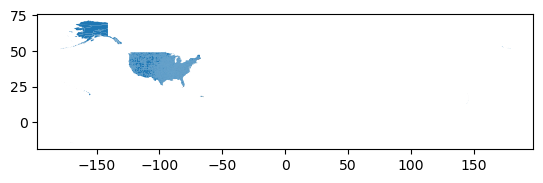

In [150]:
shape.plot()

In [151]:
wa_geo_data = merge_geo('Data/geodata/cb_2022_us_county_500k.shp', xlsx_file)
wa_geo_data

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,...,Drug Category,Death Count,Population,Crude Death Rate,Crude Lower CI,Crude Upper CI,Adjusted Death Rate,Adjusted Lower CI,Adjusted Upper CI,Date-Time Stamp
0,12,037,00306911,0500000US12037,12037,Franklin,Franklin County,FL,Florida,06,...,Cocaine,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-25 08:33:43.039
1,12,037,00306911,0500000US12037,12037,Franklin,Franklin County,FL,Florida,06,...,Heroin,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-25 08:33:43.039
2,12,037,00306911,0500000US12037,12037,Franklin,Franklin County,FL,Florida,06,...,Psychostimulants,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-25 08:33:43.039
3,12,037,00306911,0500000US12037,12037,Franklin,Franklin County,FL,Florida,06,...,Any Drug,*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-25 08:33:43.039
4,12,037,00306911,0500000US12037,12037,Franklin,Franklin County,FL,Florida,06,...,Any Drug,*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-25 08:33:43.039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63107,53,007,01531932,0500000US53007,53007,Chelan,Chelan County,WA,Washington,06,...,Psychostimulants,23,392370.0,5.86,3.91,8.8,6.56,4.05,10.14,2023-07-25 08:33:43.039
63108,53,007,01531932,0500000US53007,53007,Chelan,Chelan County,WA,Washington,06,...,Psychostimulants,29,395200.0,7.34,5.11,10.54,7.92,5.17,11.7,2023-07-25 08:33:43.039
63109,53,007,01531932,0500000US53007,53007,Chelan,Chelan County,WA,Washington,06,...,Synthetic Opioids,11,388620.0,2.83,1.58,5.07,3.25,1.59,6.02,2023-07-25 08:33:43.039
63110,53,007,01531932,0500000US53007,53007,Chelan,Chelan County,WA,Washington,06,...,Synthetic Opioids,13,392370.0,3.31,1.94,5.67,4.21,2.22,7.31,2023-07-25 08:33:43.039


In [152]:
wa_geo_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 63112 entries, 0 to 63111
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   STATEFP              63112 non-null  object        
 1   COUNTYFP             63112 non-null  object        
 2   COUNTYNS             63112 non-null  object        
 3   AFFGEOID             63112 non-null  object        
 4   GEOID                63112 non-null  object        
 5   NAME                 63112 non-null  object        
 6   NAMELSAD             63112 non-null  object        
 7   STUSPS               63112 non-null  object        
 8   STATE_NAME           63112 non-null  object        
 9   LSAD                 63112 non-null  object        
 10  ALAND                63112 non-null  int64         
 11  AWATER               63112 non-null  int64         
 12  geometry             63112 non-null  geometry      
 13  Year                 63

In [153]:
def drug_overdose_change(data, start=2015.0, end=2023.0):
  wa_data = data[data['STATE_NAME'] == 'Washington']
  drug = wa_data['Drug Category'] == 'Any Drug'
  county = wa_data['Geography'] == 'County'
  year = (wa_data['Year'] >= start) & (wa_data['Year'] <= end)
  time = (wa_data['Time Aggregation'] == '1 year rolling counts')
  remove_star = wa_data['Death Count'] != '*'
  county_data = wa_data[drug & county & time & year & remove_star].copy()
  county_data['Death Count'] = county_data['Death Count'].astype('int')
  county_data = county_data.dissolve(by='Year', aggfunc='sum').reset_index()
  fig = px.line(county_data, x="Year", y="Death Count",
                title=f"Drug Overdose Deaths in WA between {int(start)} and {int(end)}", markers=True)
  fig.update_layout(title_x=0.5, title_y=0.95,  font=dict(size=20))
  fig.update_traces(line=dict(width=4), marker=dict(size=10))

  fig.show()

In [154]:
is_washington = wa_geo_data['STATE_NAME'] == 'Washington'
is_opioid = (wa_geo_data['Drug Category'] == 'Any Opioid')
county = (wa_geo_data['Geography'] == 'County')
year = (wa_geo_data['Year'] >= 2015.0) & (wa_geo_data['Year'] <= 2023.0)
time = (wa_geo_data['Time Aggregation'] == '1 year rolling counts')
remove_star = (wa_geo_data['Death Count'] != '*')
county_data = wa_geo_data[is_washington & is_opioid & county & year & time & remove_star].copy()
county_data['Death Count'] = county_data['Death Count'].astype('int')
fig = px.line(county_data, x="Year", y="Death Count",
                title=f"Drug Overdose Deaths in WA between {int(2015.0)} and {int(2023.0)}", markers=True)
fig.update_layout(title_x=0.5, title_y=0.95,  font=dict(size=20))
fig.update_traces(line=dict(width=4), marker=dict(size=10))

fig.show()

In [155]:
drug_overdose_change(wa_geo_data)

TypeError: datetime64 type does not support sum operations

In [ ]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [ ]:
def overdose_geo(data, start=2015.0, end=2023.0) -> None:
    wa_data = data[data["STATE_NAME"] == "Washington"].copy()
    drug = wa_data["Drug Category"] == "Any Drug"
    county = wa_data["Geography"] == "County"
    wa_data["Year"] = pd.to_numeric(data["Year"], errors="coerce")
    year = (wa_data["Year"] >= (start - 1)) & (wa_data["Year"] <= (end + 1))
    time = wa_data["Time Aggregation"] == "1 year rolling counts"
    remove_star = wa_data["Death Count"] != "*"
    county_data = wa_data[drug & county & time & year & remove_star].copy()
    county_data["Death Count"] = county_data["Death Count"].astype("int")
    county_data = county_data.groupby("Year").agg({"Death Count": "sum"}).reset_index()

    fig = px.line(
        county_data,
        x="Year",
        y="Death Count",
        title=f"Drug Overdose Deaths in WA between \
            {int(start)} and {int(end)}",
        markers=True
    )
    fig.update_layout(title_x=0.5, title_y=0.95, font=dict(size=20))
    fig.update_traces(line=dict(width=4), marker=dict(size=10))

    fig.show()
    fig.write_image('overdose_wa.png')

In [ ]:
overdose_geo(wa_geo_data)

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [ ]:
def overdose_deaths_counties(data, drug_name="Any Drug", year_date=2022.0):
    """
    This function takes in the geospatial dataframe and returns the counties
    in Washington that have the highest number of drug overdose cases.
    """
    data = data[data["STATE_NAME"] == "Washington"]
    drug = data["Drug Category"] == drug_name
    county = data["Geography"] == "County"
    year = data["Year"] == year_date
    time = data["Time Aggregation"] == "1 year rolling counts"
    remove_star = data["Death Count"] != "*"
    county_data = data[drug & county & time & year & remove_star]
    # county_data = county_data[['Location', 'geometry',
    # 'Death Count', 'Time Aggregation', 'Year']]
    county_data["Death Count"] = county_data["Death Count"].astype("int")

    fig, ax = plt.subplots(1)
    data.plot(ax=ax, color="#d3d3d3")
    county_data.plot(ax=ax, column="Death Count", legend=True)
    plt.title(f"Washington County Overdose Deaths in {int(year_date)}")
    plt.savefig("county_population_map.png")

c:\Users\brand\anaconda3\envs\cse163\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



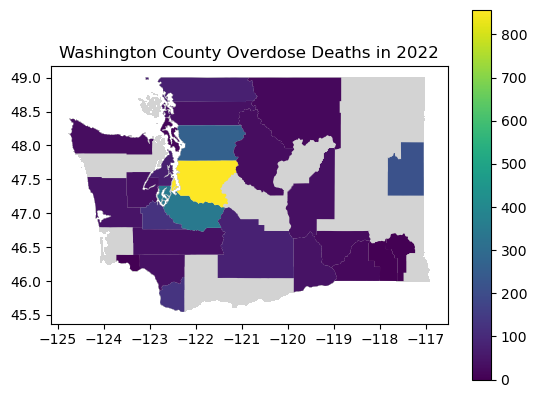

In [ ]:
overdose_deaths_counties(wa_geo_data)

In [ ]:
national_geo_data = merge_geo(
        "Data/geodata/cb_2022_us_county_500k.shp",
        csv_file_name="Data/NationalOverdose.csv",
    )
national_geo_data

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,...,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
0,01,069,00161560,0500000US01069,01069,Houston,Houston County,AL,Alabama,06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,48,225,01383898,0500000US48225,48225,Houston,Houston County,TX,Texas,06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13,153,01671693,0500000US13153,13153,Houston,Houston County,GA,Georgia,06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27,055,00659473,0500000US27055,27055,Houston,Houston County,MN,Minnesota,06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,47,083,01648578,0500000US47083,47083,Houston,Houston County,TN,Tennessee,06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,January,12 month-ending,Methadone (T40.3),308,100,0.493648,New York City,Underreported due to incomplete data.,*,323
59678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,January,12 month-ending,Heroin (T40.1),754,100,0.493648,New York City,Underreported due to incomplete data.,*,791
59679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,January,12 month-ending,Number of Deaths,"57,936",100,0.493648,New York City,Underreported due to incomplete data.,*,NaN
59680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,January,12 month-ending,"Opioids (T40.0-T40.4,T40.6)","2,573",100,0.493648,New York City,Underreported due to incomplete data.,*,"2,707"


In [ ]:
national_geo_data['Indicator'].unique()

array([nan, 'Heroin (T40.1)', 'Number of Deaths', 'Methadone (T40.3)',
       'Number of Drug Overdose Deaths',
       'Psychostimulants with abuse potential (T43.6)',
       'Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)',
       'Opioids (T40.0-T40.4,T40.6)', 'Cocaine (T40.5)',
       'Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)',
       'Natural & semi-synthetic opioids (T40.2)',
       'Percent with drugs specified',
       'Synthetic opioids, excl. methadone (T40.4)'], dtype=object)

In [ ]:
national_geo_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 59682 entries, 0 to 59681
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   STATEFP                        4410 non-null   object  
 1   COUNTYFP                       4410 non-null   object  
 2   COUNTYNS                       4410 non-null   object  
 3   AFFGEOID                       4410 non-null   object  
 4   GEOID                          4410 non-null   object  
 5   NAME                           4410 non-null   object  
 6   NAMELSAD                       4410 non-null   object  
 7   STUSPS                         4410 non-null   object  
 8   STATE_NAME                     4410 non-null   object  
 9   LSAD                           4410 non-null   object  
 10  ALAND                          4410 non-null   float64 
 11  AWATER                         4410 non-null   float64 
 12  geometry                

In [ ]:
filtered_national = national_geo_data.copy()
filtered_national = filtered_national[['NAME', 'geometry', 'State', 'Year', 'Month', 'Period', 'Indicator', 'Data Value']]
any_drug = (filtered_national['Indicator'] == 'Number of Drug Overdose Deaths')
year = (filtered_national['Year'] == 2022.0)
month = filtered_national['Month'] == 'January'
states = (filtered_national['State'] != 'AK') & (filtered_national['State'] != 'YC') & (filtered_national['State'] != 'US') & (filtered_national['State'] != 'HI') 
filtered_national = filtered_national[any_drug & year & states & month]
filtered_national


,NAME,geometry,State,Year,Month,Period,Indicator,Data Value
3107,District of Columbia,"POLYGON ((-77.11976 38.93434, -77.11253 38.940...",DC,2022.0,January,12 month-ending,Number of Drug Overdose Deaths,537
5475,NaN,None,AL,2022.0,January,12 month-ending,Number of Drug Overdose Deaths,"1,331"
6651,NaN,None,AR,2022.0,January,12 month-ending,Number of Drug Overdose Deaths,634
7827,NaN,None,AZ,2022.0,January,12 month-ending,Number of Drug Overdose Deaths,"2,772"
9003,NaN,None,CA,2022.0,January,12 month-ending,Number of Drug Overdose Deaths,"11,353"
10179,NaN,None,CO,2022.0,January,12 month-ending,Number of Drug Overdose Deaths,"1,931"
11355,NaN,None,CT,2022.0,January,12 month-ending,Number of Drug Overdose Deaths,"1,547"
12531,NaN,None,DE,2022.0,January,12 month-ending,Number of Drug Overdose Deaths,507
13707,NaN,None,FL,2022.0,January,12 month-ending,Number of Drug Overdose Deaths,"8,145"
14883,NaN,None,GA,2022.0,January,12 month-ending,Number of Drug Overdose Deaths,"2,494"


In [179]:
usa_data = pd.read_csv('Data/NationalOverdose.csv')
usa_data = usa_data[['State', 'Year', 'Month', 'Period', 'Indicator', 'Data Value']].copy()
usa_data['Year'] = usa_data['Year'].astype(str)
any_drug = (usa_data['Indicator'] == 'Number of Drug Overdose Deaths')

# Create masks
year = (usa_data['Year'] == '2019') | (usa_data['Year'] == '2020')
month = (usa_data['Month'] == 'March')
states = (usa_data['State'] == 'WA') | (usa_data['State'] == 'US')

# Filter data
usa_data = usa_data[any_drug & year & month & states]
usa_data

fig = px.bar(usa_data, x='Year', y='Data Value', color='State', title='Drug Overdose Deaths in Washington vs. U.S.')
fig.update_layout(barmode='stack')
fig.update_yaxes(type='log')
fig.update_yaxes(title="Death Count")
# fig.write_image('wa_versus_us.png')

c:\Users\brand\anaconda3\envs\cse163\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



KeyboardInterrupt: 

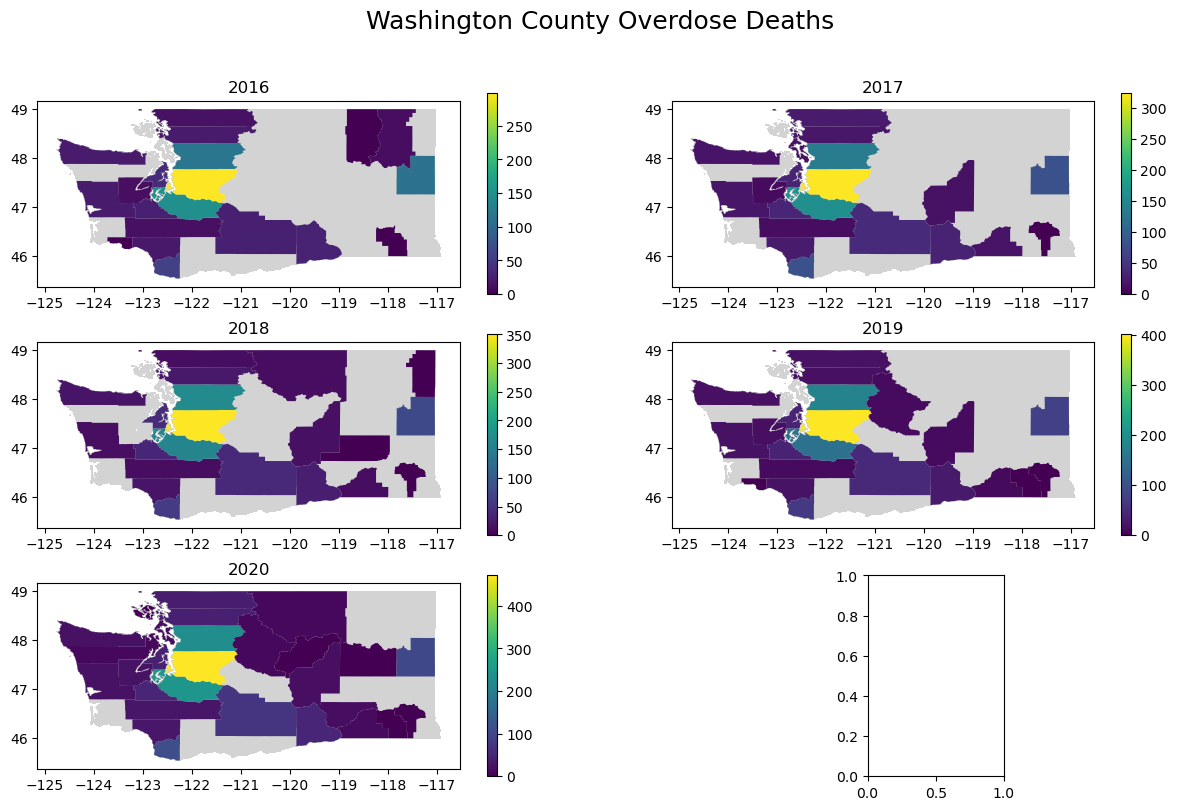

In [180]:
def overdose_deaths_counties_test(data: gpd.GeoDataFrame, drug_name = 'Any Drug', year_start = 2016.0, year_end = 2022.0) -> None:
  """
  """
  data = data[data['STATE_NAME'] == 'Washington'].copy()
  drug = data['Drug Category'] == drug_name
  county = data['Geography'] == 'County'
  time = (data['Time Aggregation'] == '1 year rolling counts')
  remove_star = data['Death Count'] != '*'
  county_data = data[drug & county & time & remove_star].copy()
  county_data['Death Count'] = county_data['Death Count'].astype('int')

  plt.figure(figsize=(15, 12))
  plt.subplots_adjust(hspace=0.2)
  plt.suptitle("Washington County Overdose Deaths", fontsize=18, y=0.95)
  n = int(year_end - year_start)
  height, width = n // 2 + 1, 2
  for i in range(int(year_start), int(year_end)+1):
      year = (county_data['Year'] == i)
      year_data = county_data[year]

      ax = plt.subplot(height, width, i - int(year_start)+1)

      data.plot(ax=ax, color='#d3d3d3')
      year_data.plot(ax=ax, column='Death Count', legend=True)
      ax.set_title(i)
      ax.set_aspect('equal')
  plt.show()

overdose_deaths_counties_test(wa_geo_data)